In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
# Data Cleaning/Processing Operation 1: Extract the features that we want
salary = pd.read_csv("survey_results_public.csv")
salary = salary[["Employment","RemoteWork" ,"EdLevel", "YearsCodePro", "DevType", "OrgSize", "Country","LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith","ConvertedCompYearly"]]
print(len(salary))
print(salary.dtypes)

73268
Employment                 object
RemoteWork                 object
EdLevel                    object
YearsCodePro               object
DevType                    object
OrgSize                    object
Country                    object
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
ConvertedCompYearly       float64
dtype: object


In [4]:
# Data Cleaning/Processing Operation 2: Drop missing values
# Drop all rows with "NA"
salary = salary[pd.notna(salary["Employment"])]
salary = salary[pd.notna(salary["RemoteWork"])]
salary = salary[pd.notna(salary["EdLevel"])]
salary = salary[pd.notna(salary["YearsCodePro"])]
salary = salary[pd.notna(salary["DevType"])]
salary = salary[pd.notna(salary["OrgSize"])]
salary = salary[pd.notna(salary["Country"])]
salary = salary[pd.notna(salary["LanguageHaveWorkedWith"])]
salary = salary[pd.notna(salary["DatabaseHaveWorkedWith"])]
salary = salary[pd.notna(salary["PlatformHaveWorkedWith"])]
salary = salary[pd.notna(salary["ConvertedCompYearly"])]
print(len(salary))

26687


In [5]:
# Data Cleaning/Processing Operation 3: Focus on data we’re interested in
# Step 1: focus on data with full-time employment
salary = salary[salary["Employment"] == "Employed, full-time"]
print(len(salary))

21754


In [6]:
# Data Cleaning/Processing Operation 3: Focus on data we’re interested in
# Step 2: focus on data in USA
salary = salary[salary["Country"] == "United States of America"]
print(len(salary))

5633


In [7]:
# Data Cleaning/Processing Operation 3: Focus on data we’re interested in
# Step 3: focus on data for developers
salary = salary[salary["DevType"].str.contains("Developer, full-stack") | salary["DevType"].str.contains("Developer, front-end") | salary["DevType"].str.contains("Developer, back-end")]
print(len(salary))
salary.describe()

4626


,ConvertedCompYearly
count,4.626000e+03
mean,3.916226e+05
std,1.240966e+06
min,4.900000e+01
25%,1.100000e+05
50%,1.500000e+05
75%,2.000000e+05
max,2.250000e+07


In [8]:
# Data Cleaning/Processing Operation 4: Drop invalid values
salary = salary[salary["ConvertedCompYearly"] > 0]
print(len(salary))
salary.describe()

4626


,ConvertedCompYearly
count,4.626000e+03
mean,3.916226e+05
std,1.240966e+06
min,4.900000e+01
25%,1.100000e+05
50%,1.500000e+05
75%,2.000000e+05
max,2.250000e+07


In [9]:
print(salary.dtypes)

Employment                 object
RemoteWork                 object
EdLevel                    object
YearsCodePro               object
DevType                    object
OrgSize                    object
Country                    object
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
ConvertedCompYearly       float64
dtype: object


In [10]:
# Data Cleaning/Processing Operation 5: Cleanup and formatting the number
# Make "YearsCodePro" contain only numeric values
salary = salary.replace("Less than 1 year",0)
salary = salary.replace("More than 50 years",50)
salary["YearsCodePro"] = salary["YearsCodePro"].apply(lambda x: int(x))
print(salary.dtypes)

Employment                 object
RemoteWork                 object
EdLevel                    object
YearsCodePro                int64
DevType                    object
OrgSize                    object
Country                    object
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
ConvertedCompYearly       float64
dtype: object


In [11]:
# Data Cleaning/Processing Operation 6: Remove duplicate row 
salary = salary.drop_duplicates()
print(len(salary))

4626


In [12]:
salary["DevType"].value_counts()

DevType
Developer, full-stack                                                                                                                                                                         987
Developer, back-end                                                                                                                                                                           554
Developer, full-stack;Developer, back-end                                                                                                                                                     189
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                183
Developer, front-end                                                                                                                                                                          122
                      

In [13]:
# Data Cleaning/Processing Operation 7: Use one hot encoding to process the data
# Use one hot encoding for frone-end, back-end and full-stack
salary["frontEnd"] = 0
salary["frontEnd"].mask((salary["DevType"].str.contains("Developer, full-stack")) | (salary["DevType"].str.contains("Developer, front-end")), 1, inplace=True)

salary["backEnd"] = 0
salary["backEnd"].mask((salary["DevType"].str.contains("Developer, full-stack")) | (salary["DevType"].str.contains("Developer, back-end")), 1, inplace=True)

salary["FrontEnd"] = 0
salary["FrontEnd"].mask((salary["frontEnd"] == 1) & (salary["backEnd"] == 0), 1, inplace=True)

salary["BackEnd"] = 0
salary["BackEnd"].mask((salary["frontEnd"] == 0) & (salary["backEnd"] == 1), 1, inplace=True)

salary["FullStack"] = 0
salary["FullStack"].mask((salary["frontEnd"] == 1) & (salary["backEnd"] == 1), 1, inplace=True)

salary.drop(columns=["DevType", "frontEnd", "backEnd"], inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_24540\680916617.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salary["frontEnd"].mask((salary["DevType"].str.contains("Developer, full-stack")) | (salary["DevType"].str.contains("Developer, front-end")), 1, inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_24540\680916617.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will 

In [14]:
salary["LanguageHaveWorkedWith"].value_counts()

LanguageHaveWorkedWith
C#;HTML/CSS;JavaScript;SQL;TypeScript                               88
C#;HTML/CSS;JavaScript;SQL                                          64
C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript                    56
HTML/CSS;JavaScript;TypeScript                                      42
HTML/CSS;JavaScript;PHP;SQL                                         35
                                                                    ..
Bash/Shell;HTML/CSS;JavaScript;Perl;SQL                              1
Bash/Shell;HTML/CSS;Java;JavaScript;Kotlin;Python                    1
Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;PowerShell;TypeScript     1
Elixir;HTML/CSS;Java;JavaScript                                      1
Go;Java;Ruby                                                         1
Name: count, Length: 2739, dtype: int64

In [15]:
# Data Cleaning/Processing Operation 8: Processing text values into numerical values
# Step 1: split “LanguageHaveWorkedWith”, create columns to keep track of the number of front-end languages, back-end languages, and system programming languages each person knows
salary["Front-endLan"] = 0
salary["Back-endLan"] = 0
salary["SysProLan"] = 0
salary["LanguageHaveWorkedWith"] = salary["LanguageHaveWorkedWith"].apply(lambda x: x.split(";"))
Front_end =["JavaScript","HTML/CSS", "Swift","TypeScript","Kotlin","Objective-C","Dart"]
Back_end =["Ruby", "SQL", "Go", "Java", "Python", "Elixir", "Perl", "Groovy", "Scala", "Rust", "C#", "Erlang", "PHP", "Clojure"]
System =["Assembly","C++","C","Rust","Go"]

for num, people in salary.iterrows():
    languages = people["LanguageHaveWorkedWith"]
    for language in languages:
        if language in Front_end:
            salary.at[num,"Front-endLan"] = salary.at[num,"Front-endLan"] +1
        elif language in Back_end:
            salary.at[num,"Back-endLan"] = salary.at[num,"Back-endLan"]+1
        elif language in System:
            salary.at[num,"SysProLan"] = salary.at[num,"SysProLan"]+1
            
salary.drop(columns=["LanguageHaveWorkedWith"], inplace=True)  

In [16]:
salary["DatabaseHaveWorkedWith"].value_counts()

DatabaseHaveWorkedWith
PostgreSQL                                                                                                                                                         363
Microsoft SQL Server                                                                                                                                               363
MySQL                                                                                                                                                              172
PostgreSQL;Redis                                                                                                                                                   142
MySQL;PostgreSQL                                                                                                                                                    93
                                                                                                                                              

In [17]:
# Data Cleaning/Processing Operation 8: Processing text values into numerical values
# Step 2: counting databases have worked with 
salary["NumOfDatabasesHaveWorkedWith"] = salary["DatabaseHaveWorkedWith"].apply(lambda x: len(x.split(";")))

salary.drop(columns=["DatabaseHaveWorkedWith"], inplace=True)  

In [18]:
salary["PlatformHaveWorkedWith"].value_counts()

PlatformHaveWorkedWith
AWS                                                                                               1299
Microsoft Azure                                                                                    563
AWS;Microsoft Azure                                                                                307
AWS;Google Cloud                                                                                   223
AWS;Heroku                                                                                         154
                                                                                                  ... 
AWS;DigitalOcean;Google Cloud;Managed Hosting                                                        1
AWS;Firebase;Google Cloud;IBM Cloud or Watson;Managed Hosting;Microsoft Azure;OpenStack;VMware       1
AWS;DigitalOcean;Google Cloud;Heroku;Linode                                                          1
AWS;DigitalOcean;Google Cloud;IBM Cloud or Watson 

In [19]:
# Data Cleaning/Processing Operation 8: Processing text values into numerical values
# Step 3: counting platforms have worked with 
salary["NumOfPlatformsHaveWorkedWith"] = salary["PlatformHaveWorkedWith"].apply(lambda x: len(x.split(";")))

salary.drop(columns=["PlatformHaveWorkedWith"], inplace=True) 

In [20]:
# Data Cleaning/Processing Operation 9: Rearrange the column
salary = salary[["Country", "EdLevel", "YearsCodePro", "Employment", "RemoteWork", "OrgSize", "FrontEnd", "BackEnd", "FullStack", "Front-endLan", "Back-endLan", "SysProLan", "NumOfDatabasesHaveWorkedWith", "NumOfPlatformsHaveWorkedWith", "ConvertedCompYearly"]]
salary.describe()

,YearsCodePro,FrontEnd,BackEnd,FullStack,Front-endLan,Back-endLan,SysProLan,NumOfDatabasesHaveWorkedWith,NumOfPlatformsHaveWorkedWith,ConvertedCompYearly
count,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000,4.626000e+03
mean,11.408776,0.042802,0.260052,0.697147,2.082793,2.584738,0.232598,2.719196,1.843709,3.916226e+05
std,8.942531,0.202431,0.438710,0.459542,1.167237,1.389792,0.597965,1.620693,1.092481,1.240966e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.900000e+01
25%,5.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.100000e+05
50%,9.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.500000e+05
75%,16.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,2.000000,2.000000e+05
max,50.000000,1.000000,1.000000,1.000000,6.000000,13.000000,3.000000,15.000000,11.000000,2.250000e+07


<Axes: xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>

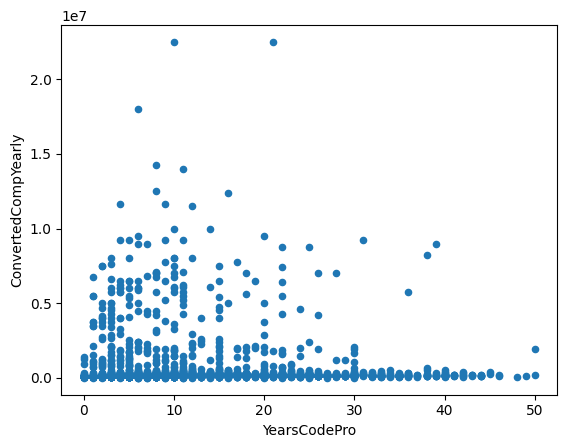

In [21]:
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")

<Axes: xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>

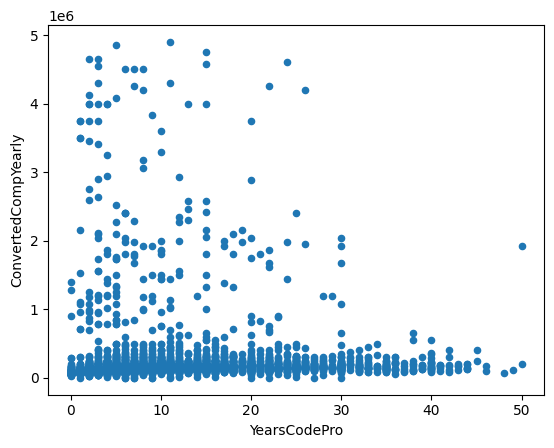

In [22]:
# EDA 1: Check outlier
# Step 1: remove data with annual salary >= 5,000,000
salary = salary[salary["ConvertedCompYearly"] < 5000000]
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")

<Axes: xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>

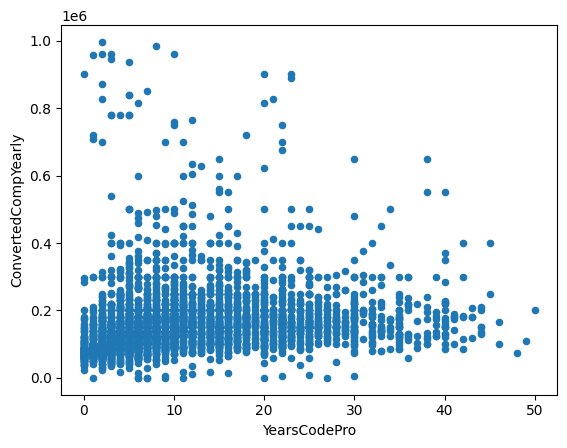

In [23]:
# EDA 2: Check outlier
# Step 2: remove data with annual salary >= 1,000,000
salary = salary[salary["ConvertedCompYearly"] < 1000000]
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")

,YearsCodePro,FrontEnd,BackEnd,FullStack,Front-endLan,Back-endLan,SysProLan,NumOfDatabasesHaveWorkedWith,NumOfPlatformsHaveWorkedWith,ConvertedCompYearly
count,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,11.063885,0.045733,0.255540,0.698727,2.101367,2.573786,0.222537,2.716172,1.844649,152279.398397
std,8.321183,0.208930,0.436216,0.458865,1.160581,1.389268,0.584304,1.622486,1.088473,66232.121742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,49.000000
25%,5.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,107000.000000
50%,9.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,140000.000000
75%,16.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,2.000000,180000.000000
max,38.000000,1.000000,1.000000,1.000000,6.000000,13.000000,3.000000,15.000000,11.000000,453000.000000


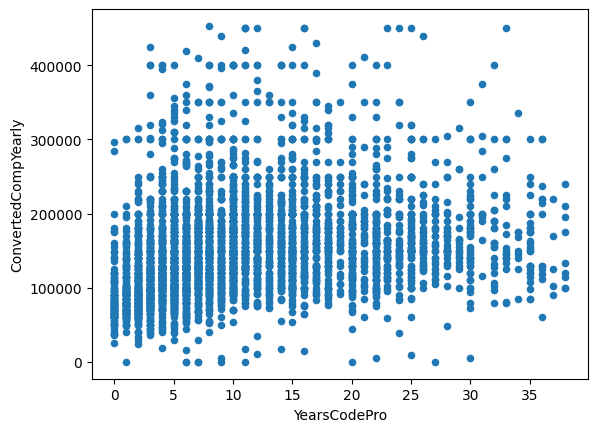

In [24]:
# EDA 3: Check outlier
# Step 3: filter out data more than 3 std devs from mean
salary = salary[(np.abs(stats.zscore(salary[["YearsCodePro", "ConvertedCompYearly"]])) < 3).all(axis=1)]
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")
salary.describe()

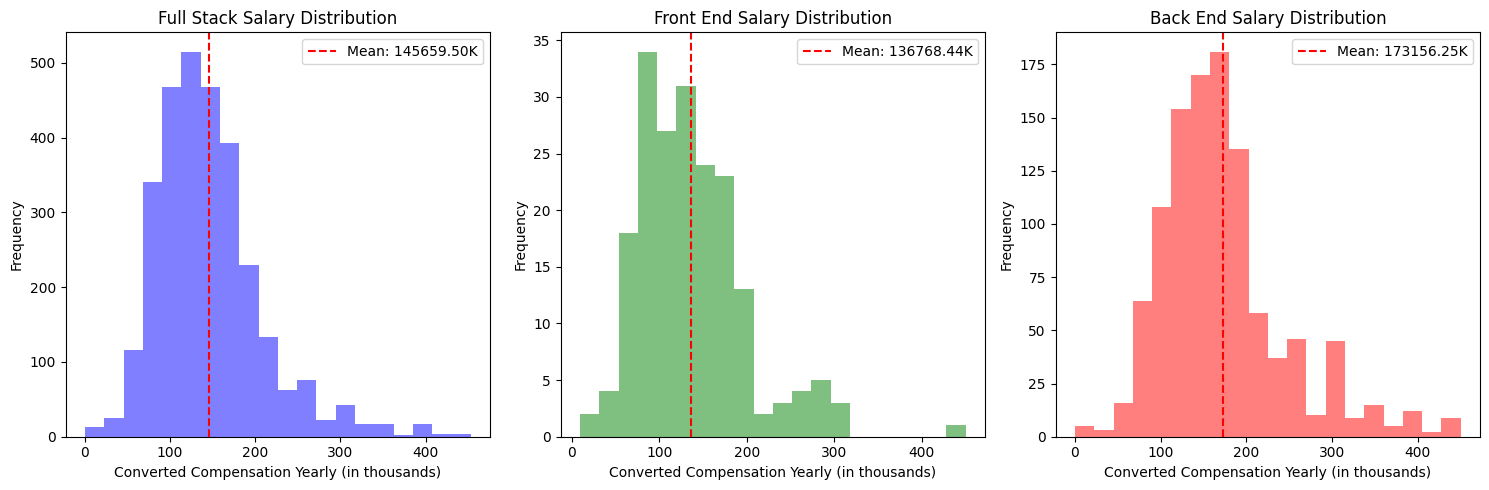

In [25]:
#EDA 2, create histograms for certain features to view their impact on salary

# Function to convert salary to thousands
def salary_to_thousands(salary):
    return salary / 1000

# Filter the data for each developer type
salary_full_stack = salary[salary['FullStack'] == 1]
salary_front_end = salary[salary['FrontEnd'] == 1]
salary_back_end = salary[salary['BackEnd'] == 1]

# Calculate the mean salary for each developer type
mean_salary_full_stack = salary_full_stack["ConvertedCompYearly"].mean()
mean_salary_front_end = salary_front_end["ConvertedCompYearly"].mean()
mean_salary_back_end = salary_back_end["ConvertedCompYearly"].mean()

# Create three separate subplots for each developer type
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for each developer type
axs[0].hist(salary_to_thousands(salary_full_stack["ConvertedCompYearly"]), bins=20, alpha=0.5, color='blue')
axs[0].set_title('Full Stack Salary Distribution')
axs[0].set_xlabel('Converted Compensation Yearly (in thousands)')
axs[0].set_ylabel('Frequency')
axs[0].axvline(x=mean_salary_full_stack / 1000, color='red', linestyle='--', label=f'Mean: {mean_salary_full_stack:.2f}K')
axs[0].legend()

axs[1].hist(salary_to_thousands(salary_front_end["ConvertedCompYearly"]), bins=20, alpha=0.5, color='green')
axs[1].set_title('Front End Salary Distribution')
axs[1].set_xlabel('Converted Compensation Yearly (in thousands)')
axs[1].set_ylabel('Frequency')
axs[1].axvline(x=mean_salary_front_end / 1000, color='red', linestyle='--', label=f'Mean: {mean_salary_front_end:.2f}K')
axs[1].legend()

axs[2].hist(salary_to_thousands(salary_back_end["ConvertedCompYearly"]), bins=20, alpha=0.5, color='red')
axs[2].set_title('Back End Salary Distribution')
axs[2].set_xlabel('Converted Compensation Yearly (in thousands)')
axs[2].set_ylabel('Frequency')
axs[2].axvline(x=mean_salary_back_end / 1000, color='red', linestyle='--', label=f'Mean: {mean_salary_back_end:.2f}K')
axs[2].legend()

plt.tight_layout()
plt.show()

In [26]:
# EDA 3 Calculate the interquartile range for salary as well as other statistics pertaining to the quartiles to gain insight on how the data is distributed



# Calculate the interquartile range (IQR) for the 'ConvertedCompYearly' column
# Calculate the quartiles
min=salary['ConvertedCompYearly'].quantile(0)
Q1 = salary['ConvertedCompYearly'].quantile(0.25)
Q2 = salary['ConvertedCompYearly'].quantile(0.50)  # Median
Q3 = salary['ConvertedCompYearly'].quantile(0.75)
Q4 = salary['ConvertedCompYearly'].quantile(1.00)  # Maximum

# Calculate the differences between quartiles
Q1_Q2_diff = Q2 - Q1
Q2_Q3_diff = Q3 - Q2
Q3_Q4_diff = Q4 - Q3
print("The first quarter of the data has a range of",min,"to",Q1)
print("The second quarter of the data has a range of", Q1, "to", Q2)
print("The third quarter of the data has a range of", Q2, "to", Q3)
print("The fourth quarter of the data has a range of:", Q3, "to", Q4)

# Interquartile Range (IQR)
IQR = Q3 - Q1
print("Interquartile Range (IQR) of ConvertedCompYearly:", IQR)

# Boxplot

The first quarter of the data has a range of 49.0 to 107000.0
The second quarter of the data has a range of 107000.0 to 140000.0
The third quarter of the data has a range of 140000.0 to 180000.0
The fourth quarter of the data has a range of: 180000.0 to 453000.0
Interquartile Range (IQR) of ConvertedCompYearly: 73000.0


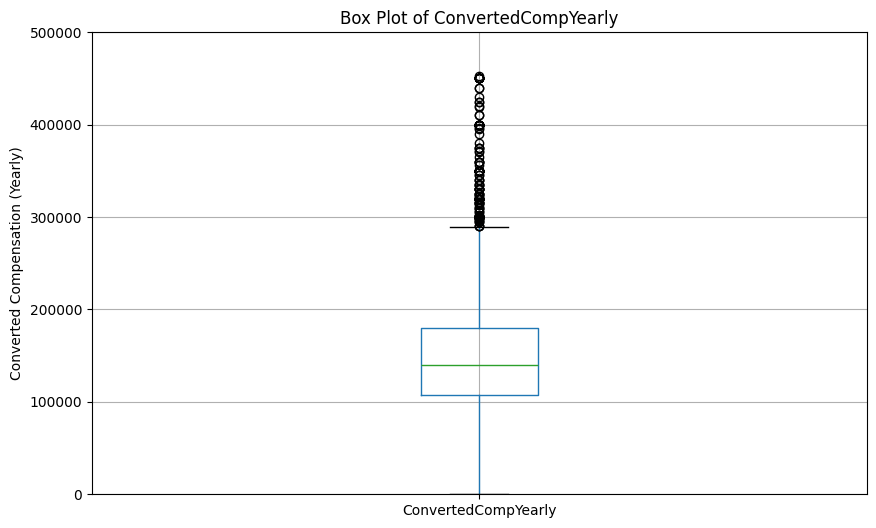

In [27]:
#EDA 4, Create a box plot to have visual insight of how the data is distributed

plt.figure(figsize=(10, 6))
salary.boxplot(column='ConvertedCompYearly')
plt.title('Box Plot of ConvertedCompYearly')
plt.ylabel('Converted Compensation (Yearly)')
plt.ylim(0, 500000)  # Adjust the y-axis limits to better accommodate the data
plt.show()

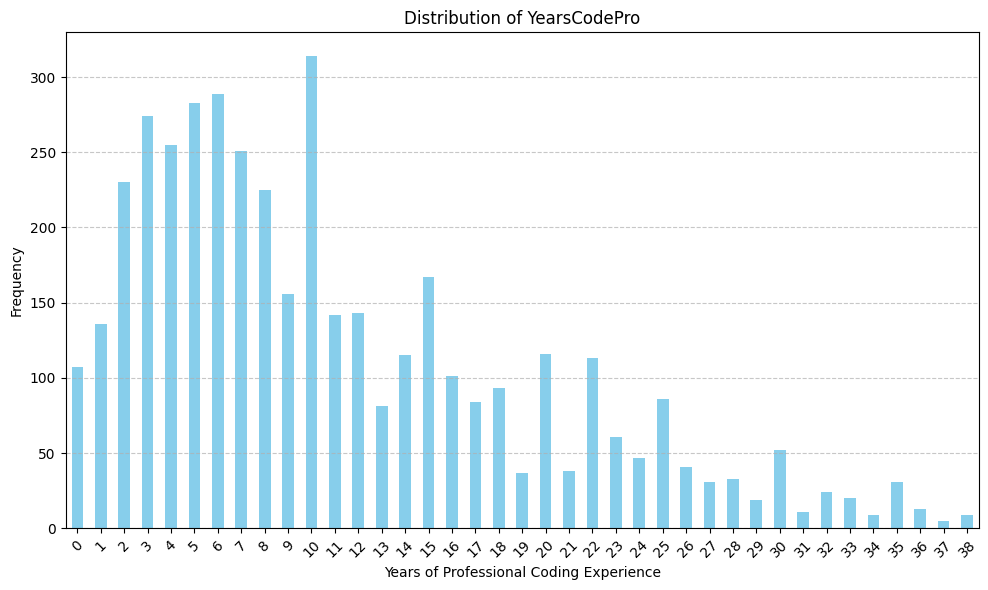

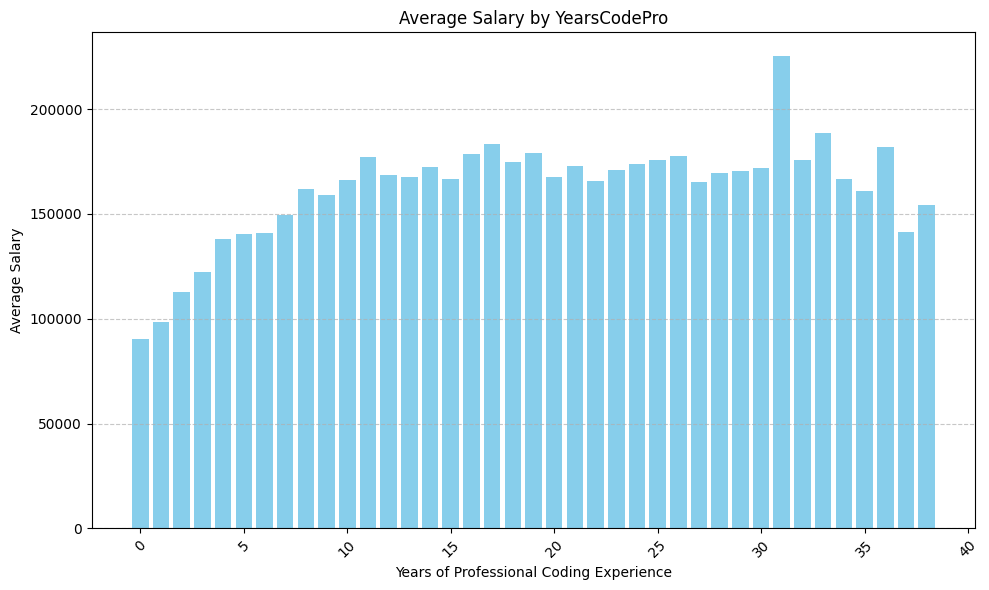

Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'RemoteWork',
       'OrgSize', 'FrontEnd', 'BackEnd', 'FullStack', 'Front-endLan',
       'Back-endLan', 'SysProLan', 'NumOfDatabasesHaveWorkedWith',
       'NumOfPlatformsHaveWorkedWith', 'ConvertedCompYearly'],
      dtype='object')


In [28]:
#EDA step 5, Create bar chart to see the distribution of salary for the "Years Code Pro" feature


# Create a bar chart for the "YearsCodePro" feature
plt.figure(figsize=(10, 6))
salary['YearsCodePro'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of YearsCodePro')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()
plt.show()

# Calculate the average salary for each category of 'YearsCodePro'
average_salary = salary.groupby('YearsCodePro')['ConvertedCompYearly'].mean().reset_index()

# Create a bar chart for the average salary by 'YearsCodePro'
plt.figure(figsize=(10, 6))
plt.bar(average_salary['YearsCodePro'], average_salary['ConvertedCompYearly'], color='skyblue')
plt.title('Average Salary by YearsCodePro')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()
plt.show()

print(salary.columns)  # Print column names


Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'RemoteWork',
       'OrgSize', 'FrontEnd', 'BackEnd', 'FullStack', 'Front-endLan',
       'Back-endLan', 'SysProLan', 'NumOfDatabasesHaveWorkedWith',
       'NumOfPlatformsHaveWorkedWith', 'ConvertedCompYearly'],
      dtype='object')
Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'RemoteWork',
       'OrgSize', 'FrontEnd', 'BackEnd', 'FullStack', 'Front-endLan',
       'Back-endLan', 'SysProLan', 'NumOfDatabasesHaveWorkedWith',
       'NumOfPlatformsHaveWorkedWith', 'ConvertedCompYearly'],
      dtype='object')


C:\Users\Owner\AppData\Local\Temp\ipykernel_24540\3365576101.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['EdLevel'] = salary['EdLevel'].map(education_duration_mapping)


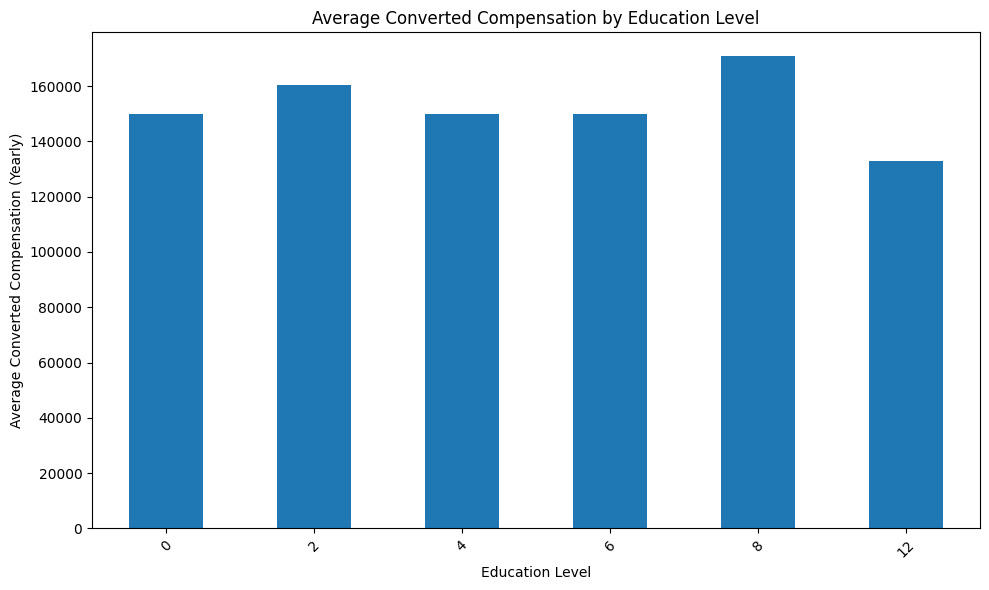

In [29]:
#EDA step 6 Explore the relationship between College experience and salary, in addition to reducing the EdLevel feature.
# Assuming 'salary' is your DataFrame

# Count the frequency of each education level

#Step 1: Map values to relevant types

# Assuming 'salary' is your DataFrame

# Count the frequency of each education level



# Assuming 'salary' is your DataFrame

# Group the data by education level and calculate the average salary for each group
# Assuming 'salary' is your DataFrame

# Define a dictionary mapping each education level to its corresponding duration in years
education_duration_mapping = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4,
    'Associate degree (A.A., A.S., etc.)': 2,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 6,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 0,
    'Some college/university study without earning a degree': 0,  # Duration not specified
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 8,
    'Professional degree (JD, MD, etc.)': 8,
    'Something else': 0,  # Duration not specified
    'Primary/elementary school': 0,
    'NaN':0
}

print(salary.columns)  # Print column names

salary['EdLevel'] = salary['EdLevel'].map(education_duration_mapping)

print(salary.columns)  # Print column names

# Plotting ConvertedComp vs MappedEdLevel
avg_comp_by_edlevel = salary.groupby('EdLevel')['ConvertedCompYearly'].mean()

# Plot the average ConvertedComp for each value of EdLevel



plt.figure(figsize=(10, 6))
avg_comp_by_edlevel.plot(kind='bar')
plt.title('Average Converted Compensation by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Converted Compensation (Yearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

['Hybrid (some remote, some in-person)' 'Fully remote' 'Full in-person']


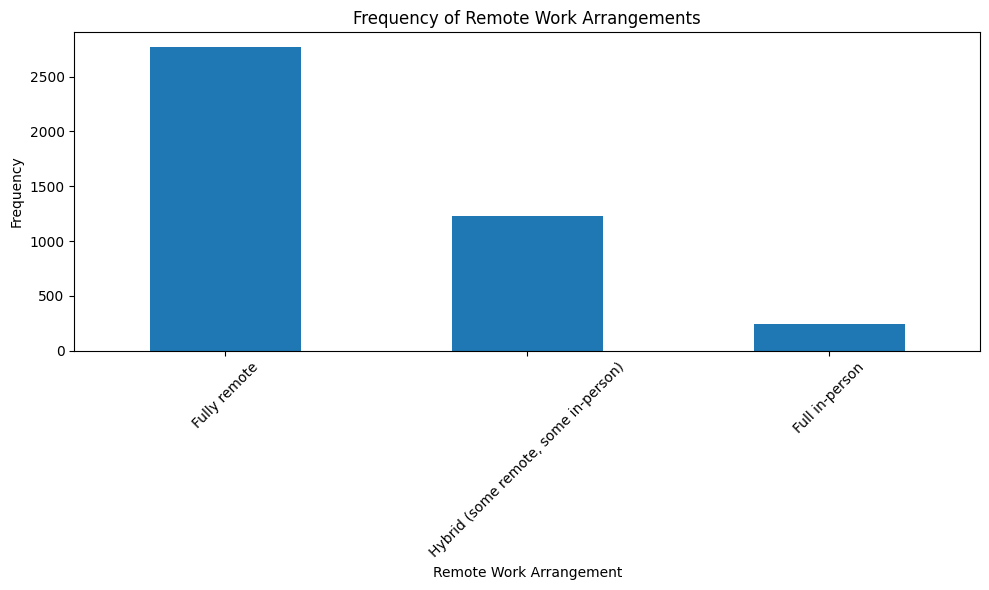

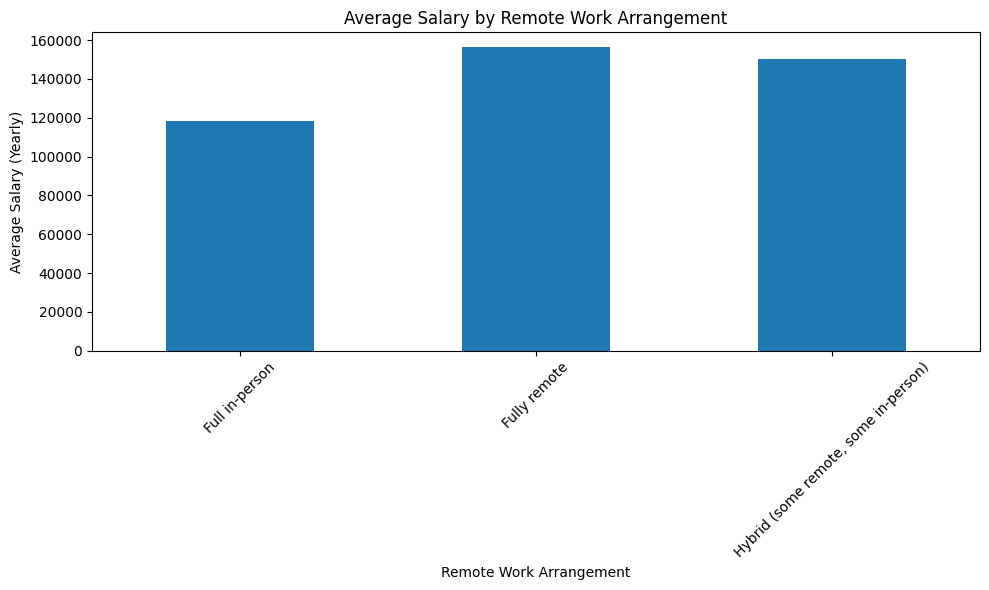

In [31]:
remote_work_values = salary['RemoteWork'].unique()
print(remote_work_values)

plt.figure(figsize=(10, 6))
salary['RemoteWork'].value_counts().plot(kind='bar')
plt.title('Frequency of Remote Work Arrangements')
plt.xlabel('Remote Work Arrangement')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average salary for each category in the "RemoteWork" feature
avg_salary_by_remote_work = salary.groupby('RemoteWork')['ConvertedCompYearly'].mean()

# Plot the average salary for each category
plt.figure(figsize=(10, 6))
avg_salary_by_remote_work.plot(kind='bar')
plt.title('Average Salary by Remote Work Arrangement')
plt.xlabel('Remote Work Arrangement')
plt.ylabel('Average Salary (Yearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()